<a href="https://colab.research.google.com/github/NgoChiThong/ProjectGK_ML_22_23/blob/main/Project_Nhom25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mô tả dữ liệu**

Dự đoán tuổi của bào ngư từ các phép đo vật lý. Độ tuổi của bào ngư xác định thông qua việc cắt vỏ nón, nhuộm nón, và đếm số vòng qua kính hiển vi, đây là một công việc nhàm chán và tốn thời gian. Các phép đo khác, được dễ dàng hơn để có được, được sử dụng để dự đoán tuổi. Như mô hình thời tiết và vị trí (thức ăn sẵn có) được yêu cầu để giải quyết vấn đề. Tập dữ liệu có 9 thuộc tính, trong đó có 1 thuộc tính dạng chuỗi, 8 thuộc tính dạng số. 

• Sex: thuộc tính rời rạc, biểu thị giới tính (con đực _ M, con cái _ F và trứng _ I). 

• Length: thuộc tính liên tục, biểu thị độ dài bào ngư. 

• Diameter: thuộc tính liên tục, biểu thị đường kính bào ngư. 

• Height: thuộc tính liên tục, biểu thị chiều cao bào ngư. 

• Whole weight: thuộc tính liên tục, biểu thị trọng lượng một con bào ngư. 

• Shucked weight: thuộc tính liên tục, biểu thị trong lượng thịt con bào ngư. 

• Viscera weight: thuộc tính liên tục, biểu thị trọng lượng nội tạng con bào ngư. 

• Shell weight: thuộc tính liên tục, biểu thị trọng lượng vỏ bào ngư. 

• Rings: Biểu thị đưa ra tuổi theo năm.

**Các vấn đề của Abalone Data Set:**
1. Không rõ nguồn gốc: Tập dữ liệu Abalone dataset không cung cấp thông tin về nguồn gốc và phương pháp thu thập dữ liệu. Điều này có thể gây khó khăn trong việc đánh giá tính chính xác và độ tin cậy của tập dữ liệu.
2. Tập dữ liệu đã cũ: Tập dữ liệu này được thu thập vào những năm 1990. Do đó, tập dữ liệu này có thể không phản ánh chính xác các xu hướng hiện tại trong xã hội.
3. Số lượng mẫu của dạng chuỗi bất đồng đều. Điều này dẫn đến sự mất cân bằng giữa các nhãn và có thể ảnh hưởng đến hiệu suất của mô hình học máy. Điển hình như mẫu dạng I.


**Tải về các thư viện cần thiết**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

### **1. Đọc dữ liệu data** 

In [ ]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weigth', 'Viscera weight', 'Shell wigth', 'Rings']
abalon = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None, names = column_names)

In [ ]:
abalon.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weigth,Viscera weight,Shell wigth,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


**Biểu đồ**

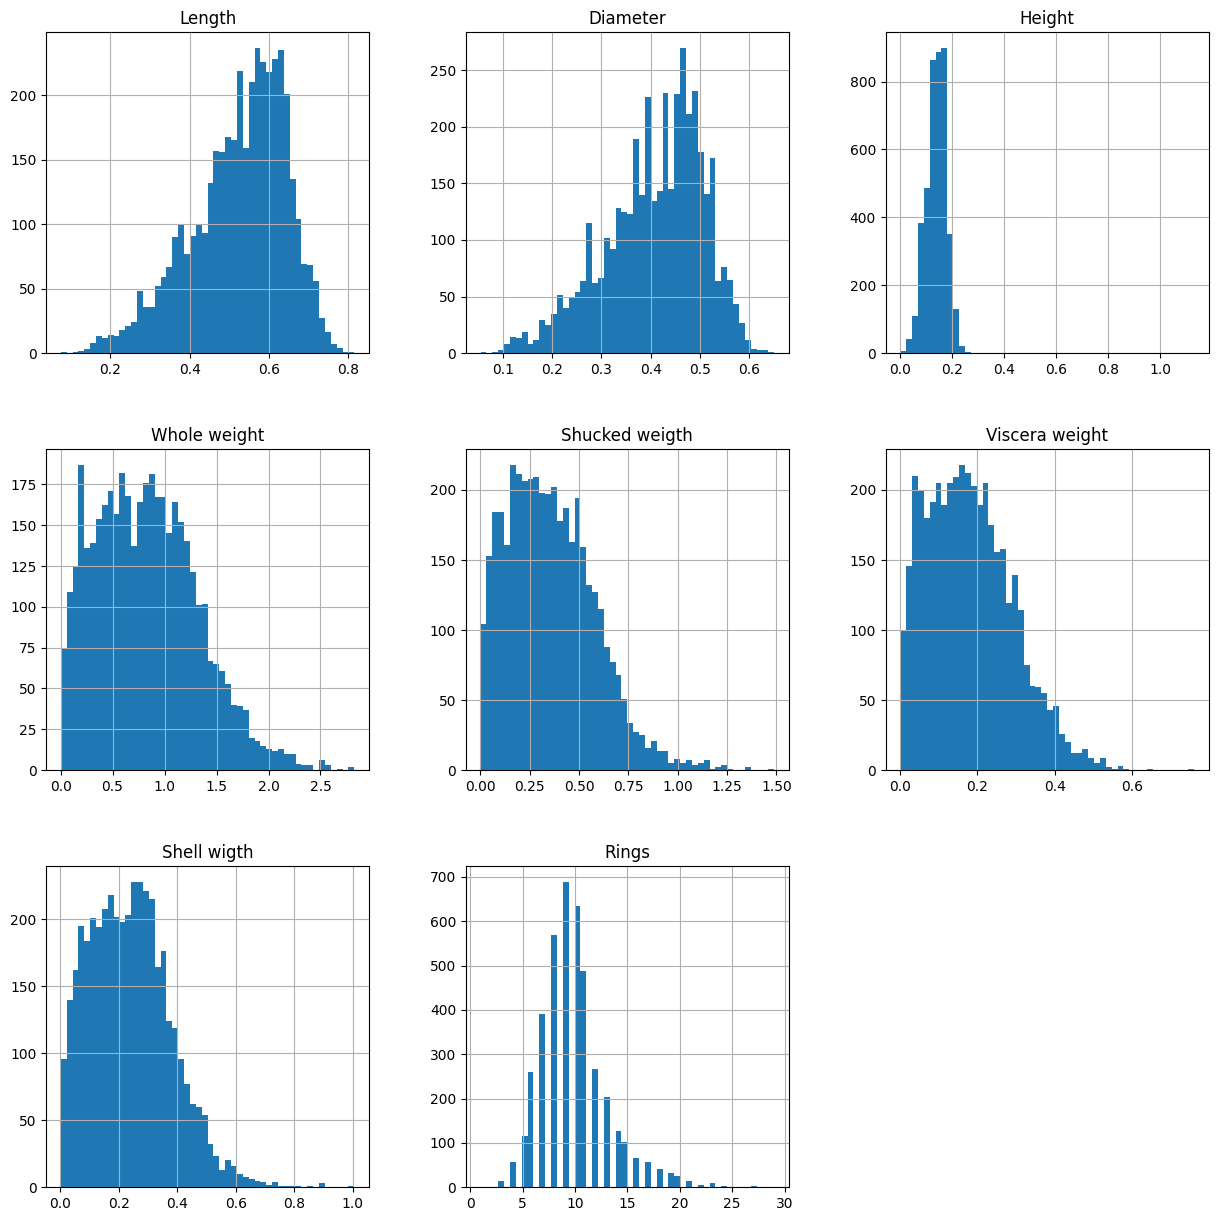

In [ ]:
abalon.hist(bins=50, figsize=(15, 15))
plt.show()

In [ ]:
abalon.shape

(4177, 9)

In [ ]:
abalon.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weigth    0
Viscera weight    0
Shell wigth       0
Rings             0
dtype: int64

In [ ]:
abalon.duplicated().sum()

0

In [ ]:
abalon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weigth  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell wigth     4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**Hiển thị số liệu thống kê của tập dữ liệu đã cho**

In [ ]:
abalon.describe()

,Length,Diameter,Height,Whole weight,Shucked weigth,Viscera weight,Shell wigth,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
import seaborn as sns

<Axes: >

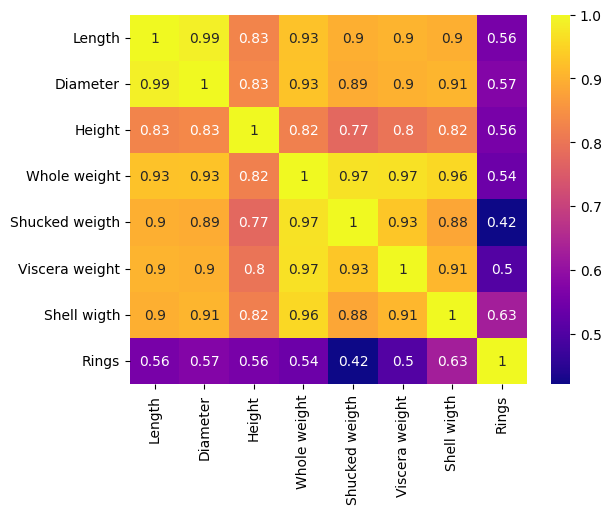

In [ ]:
sns.heatmap(corr, annot=True, cbar=True, cmap='plasma')

**2. Tiền xử lý dữ liệu**

**Đếm giá trị của mỗi thuộc tính Sex**

In [ ]:
abalon['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='Count'>

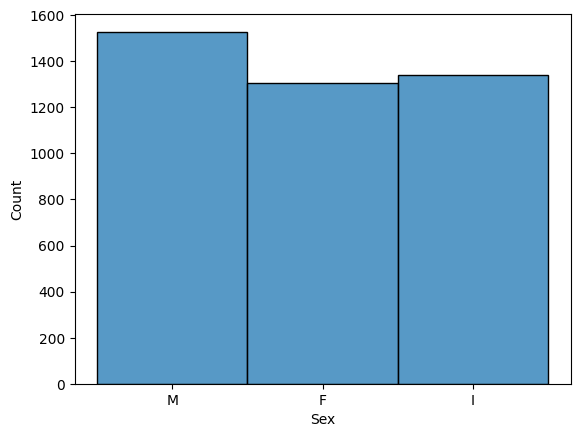

In [ ]:
sns.histplot(abalon['Sex'], bins=20)

**Chuyển đổi các giá trị Sex**

In [ ]:
abalon['Sex'] = abalon['Sex'].map({"M":0, "F":1, "I":2})

In [ ]:
abalon['Sex'].value_counts()

0    1528
2    1342
1    1307
Name: Sex, dtype: int64

<Axes: xlabel='Rings', ylabel='Count'>

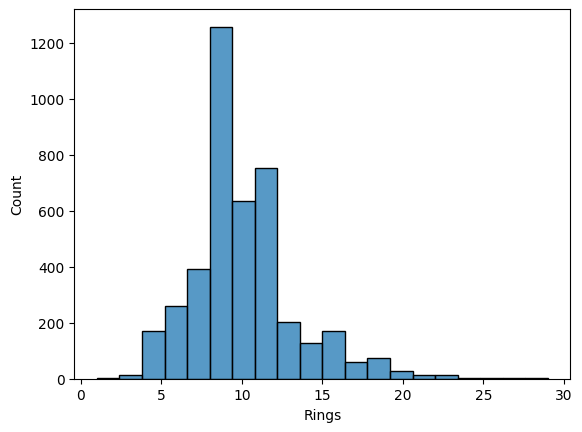

In [ ]:
sns.histplot(abalon['Rings'], bins=20)

In [ ]:
abalon['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

<Axes: xlabel='Length', ylabel='Rings'>

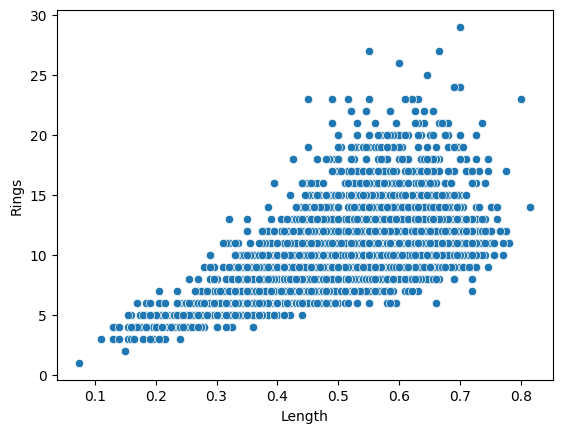

In [ ]:
sns.scatterplot(x='Length', y='Rings', data=abalon)

**Missing values (or 0 values)**

In [ ]:
(abalon['Height'] == 0).sum()

2

In [ ]:
abalon[abalon['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weigth,Viscera weight,Shell wigth,Rings
1257,2,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,2,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [ ]:
means = pd.pivot_table(abalon, index=['Sex'], aggfunc={'Height':np.mean})
means

,Height
Sex,
0,0.151381
1,0.158011
2,0.107996


**Chuẩn hóa**

> Indented block



In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(abalon[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weigth', 'Viscera weight', 'Shell wigth', 'Rings']], abalon['Rings'], test_size=0.2, random_state=2)

In [ ]:
scaler = StandardScaler().fit(X_train)
x_train_std = scaler.transform(X_train)
x_test_std = scaler.transform(X_test)

In [ ]:
print('X_train: ', x_train_std.shape)
print('X_test: ', x_test_std.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (3341, 9)
X_test:  (836, 9)
y_train:  (3341,)
y_test:  (836,)


In [ ]:
abalon

,Sex,Length,Diameter,Height,Whole weight,Shucked weigth,Viscera weight,Shell wigth,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


**3. Thuật toán**

**1. Neural network**

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(abalon.drop('Rings', axis=1).values)
y = abalon['Rings'].values

# chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# định nghĩa một hàm tạo model
def create_model(hidden_layers=1, nodes=64, activation='relu'):
    model = Sequential()
    model.add(Dense(nodes, input_dim=8, activation=activation))
    for i in range(hidden_layers-1):
        model.add(Dense(nodes, activation=activation))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

# tạo một KerasRegressor object từ hàm tạo model
regressor = KerasRegressor(build_fn=create_model, verbose=0)
    
# định nghĩa các tham số cần tìm kiếm và giá trị của chúng
params = {'hidden_layers': [1, 2, 3], 'nodes': [32, 64, 128], 'activation': ['relu', 'tanh', 'sigmoid']}

# tạo một GridSearchCV object với mô hình là regressor và các tham số cần tìm kiếm
grid = GridSearchCV(estimator=regressor, param_grid=params, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
best_score = -1*grid_result.best_score_
print("Best parameters: ", best_params)
print("Best score: ", best_score)
y_pred = grid_result.predict(X_test)

<ipython-input-16-f3d48a54bccf>:22: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=create_model, verbose=0)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters:  {'activation': 'tanh', 'hidden_layers': 3, 'nodes': 128}
Best score:  5.2152521331307895


**2. Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train_std, y_train)
y_pred_dt = dt.predict(x_test_std)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Accuracy: 0.9940191387559809
Precision: 0.7564102564102563
Recall: 0.7615384615384616
F1 Score: 0.7587412587412588


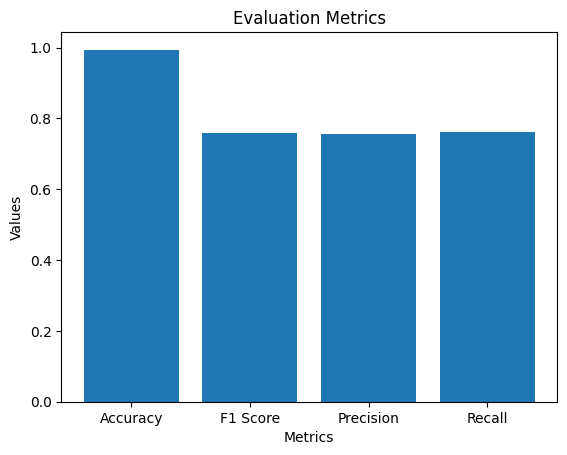

In [ ]:
# Các giá trị đánh giá
values = [accuracy_dt, f1_dt, precision_dt, recall_dt]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

**3. SVM**

**3.1 SVM linear**

In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train_std, y_train)
y_pred_l = clf.predict(x_test_std)

accuracy_l = accuracy_score(y_test, y_pred_l)
precision_l = precision_score(y_test, y_pred_l, average= 'macro')
recall_l = recall_score(y_test, y_pred_l, average= 'macro')
f1_l = f1_score(y_test, y_pred_l, average= 'macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy_l)
print("Precision:", precision_l)
print("Recall:", recall_l)
print("F1 Score:", f1_l)

Accuracy: 0.9904306220095693
Precision: 0.7115384615384616
Recall: 0.7153846153846154
F1 Score: 0.7124542124542125


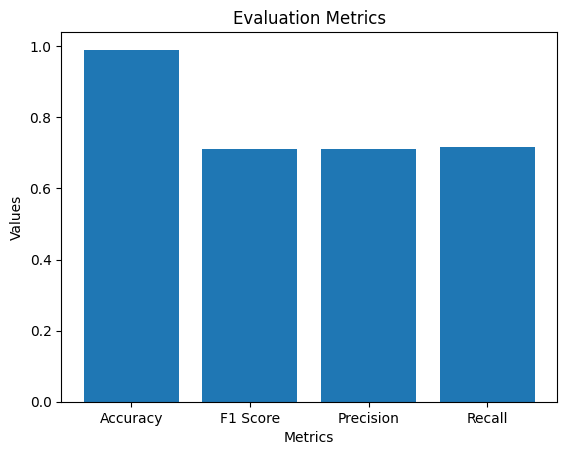

In [ ]:
# Các giá trị đánh giá
values = [accuracy_l, f1_l, precision_l, recall_l]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

**3.2 SVM rbf**

In [ ]:
clf = svm.SVC(kernel = 'rbf')
clf.fit(x_train_std, y_train)
y_pred_rbf = clf.predict(x_test_std)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average= 'macro')
recall_rbf = recall_score(y_test, y_pred_rbf, average= 'macro')
f1_rbf = f1_score(y_test, y_pred_rbf, average= 'macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy_rbf)
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1 Score:", f1_rbf)

Accuracy: 0.8660287081339713
Precision: 0.430722766534175
Recall: 0.4362841413693619
F1 Score: 0.43072057098981786


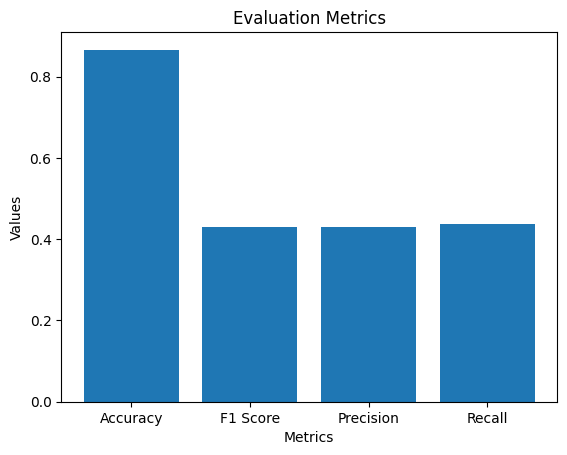

In [ ]:
# Các giá trị đánh giá
values = [accuracy_rbf, f1_rbf, precision_rbf, recall_rbf]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

**3.3 SVM poly**

In [ ]:
clf = svm.SVC(kernel = 'poly')
clf.fit(x_train_std, y_train)
y_pred_poly = clf.predict(x_test_std)

accuracy__poly = accuracy_score(y_test, y_pred_poly)
precision__poly = precision_score(y_test, y_pred_poly, average= 'macro')
recall__poly = recall_score(y_test, y_pred_poly, average= 'macro')
f1__poly = f1_score(y_test, y_pred_poly, average= 'macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy__poly)
print("Precision:", precision__poly)
print("Recall:", recall__poly)
print("F1 Score:", f1__poly)

Accuracy: 0.6543062200956937
Precision: 0.5470748544901087
Recall: 0.49496874431814
F1 Score: 0.5055722954870318


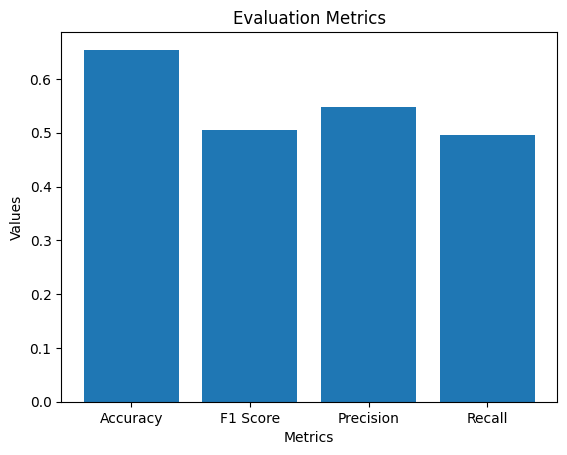

In [ ]:
# Các giá trị đánh giá
values = [accuracy__poly, f1__poly, precision__poly, recall__poly]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

**So sánh 3 kernels**

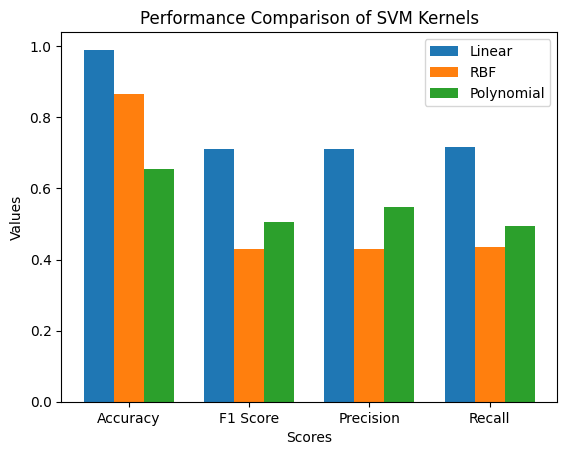

In [ ]:
# Dữ liệu
kernels = ['Linear', 'RBF', 'Polynomial']
scores = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Giá trị của kernel theo từng score
linear_scores = [accuracy_l, f1_l, precision_l, recall_l]
rbf_scores = [accuracy_rbf, f1_rbf, precision_rbf, recall_rbf]
poly_scores = [accuracy__poly, f1__poly, precision__poly, recall__poly]

# Xác định vị trí và chiều rộng của các cột
bar_width = 0.25
index = np.arange(len(scores))

# Vẽ biểu đồ cột
plt.bar(index, linear_scores, bar_width, label='Linear')
plt.bar(index + bar_width, rbf_scores, bar_width, label='RBF')
plt.bar(index + 2 * bar_width, poly_scores, bar_width, label='Polynomial')

# Đặt các chỉ mục và nhãn trục x
plt.xticks(index + bar_width, scores)
plt.xlabel('Scores')
plt.ylabel('Values')

# Đặt tiêu đề và hiển thị chú thích
plt.title('Performance Comparison of SVM Kernels')
plt.legend()

# Hiển thị biểu đồ cột
plt.show()

**4. RandomForest**

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train_std, y_train)
y_pred_r = clf.predict(x_test_std)

accuracy_r = accuracy_score(y_test, y_pred_r)
precision_r = precision_score(y_test, y_pred_r, average= 'macro')
recall_r = recall_score(y_test, y_pred_r, average= 'macro')
f1_r = f1_score(y_test, y_pred_r, average= 'macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy_r)
print("Precision:", precision_r)
print("Recall:", recall_r)
print("F1 Score:", f1_r)

Accuracy: 0.9485645933014354
Precision: 0.6725067703499817
Recall: 0.6317768959435627
F1 Score: 0.6241106396330394


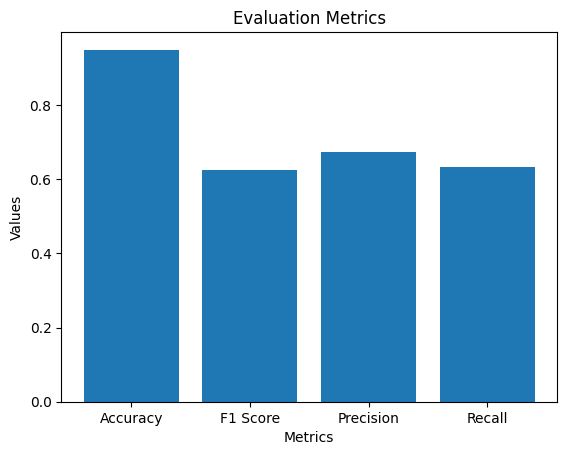

In [ ]:
# Các giá trị đánh giá
values = [accuracy_r, f1_r, precision_r, recall_r]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

**5. Naïve Bayes**

In [ ]:
model = GaussianNB()
model.fit(x_train_std, y_train)
y_pred_nb = model.predict(x_test_std)

accuracy_g = accuracy_score(y_test, y_pred_nb)
precision_g = precision_score(y_test, y_pred_nb, average= 'macro')
recall_g = recall_score(y_test, y_pred_nb, average= 'macro')
f1_g = f1_score(y_test, y_pred_nb, average= 'macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy_g)
print("Precision:", precision_g)
print("Recall:", recall_g)
print("F1 Score:", f1_g)

Accuracy: 0.9952153110047847
Precision: 0.79
Recall: 0.8
F1 Score: 0.7942857142857143


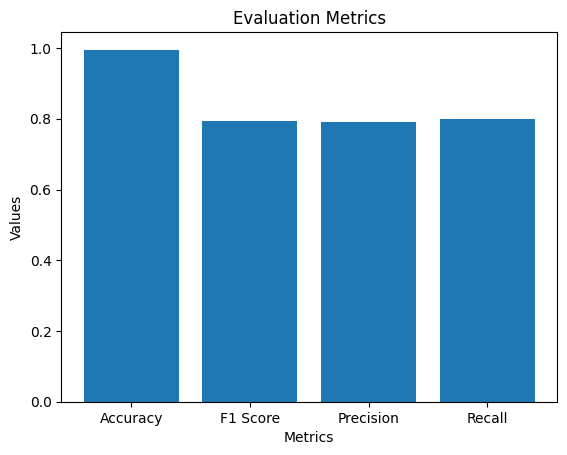

In [ ]:
# Các giá trị đánh giá
values = [accuracy_g, f1_g, precision_g, recall_g]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

**6. KNN**

In [ ]:
k_values = [3, 5, 7, 9, 11]  # Các giá trị k cần kiểm tra
best_accuracy = 0
best_k = 0

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, x_train_std, y_train, cv=5)  # Áp dụng 5-fold cross-validation
    accuracy = scores.mean()  # Đánh giá bằng độ chính xác trung bình
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k


knn_model = KNeighborsClassifier(n_neighbors=best_k)
# Huấn luyện mô hình
knn_model.fit(x_train_std, y_train) 
# Dự đoán nhãn cho tập kiểm tra
y_pred = knn_model.predict(x_test_std) 

accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average="macro")
recall_knn = recall_score(y_test, y_pred, average="macro")
f1_knn = f1_score(y_test, y_pred, average="macro")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
print("Best k:", best_k)
print("Accuracy:", accuracy_knn)
print("F1 Score:", f1_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)

Best k: 3
Accuracy: 0.7129186602870813
F1 Score: 0.3971930090818718
Precision: 0.42167765938222435
Recall: 0.38954094745143997


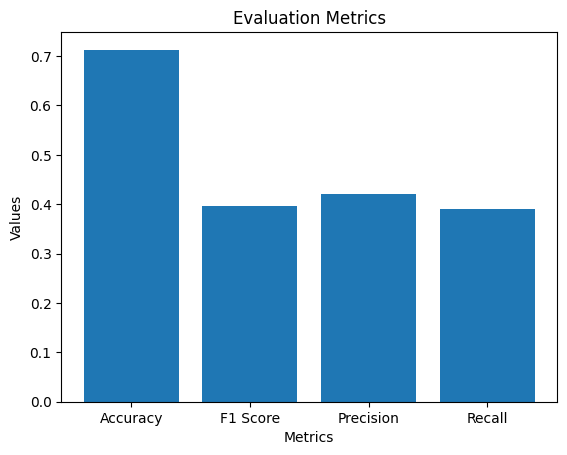

In [ ]:
# Các giá trị đánh giá
values = [accuracy_knn, f1_knn, precision_knn, recall_knn]
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Vẽ biểu đồ cột
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

In [ ]:
def prediction_age(Sex, Length, Diameter, Height, Whole_weght, shucked_weght, visc_wet, shell_weight):
        features = np.array([[Sex]])

<Figure size 640x480 with 0 Axes>

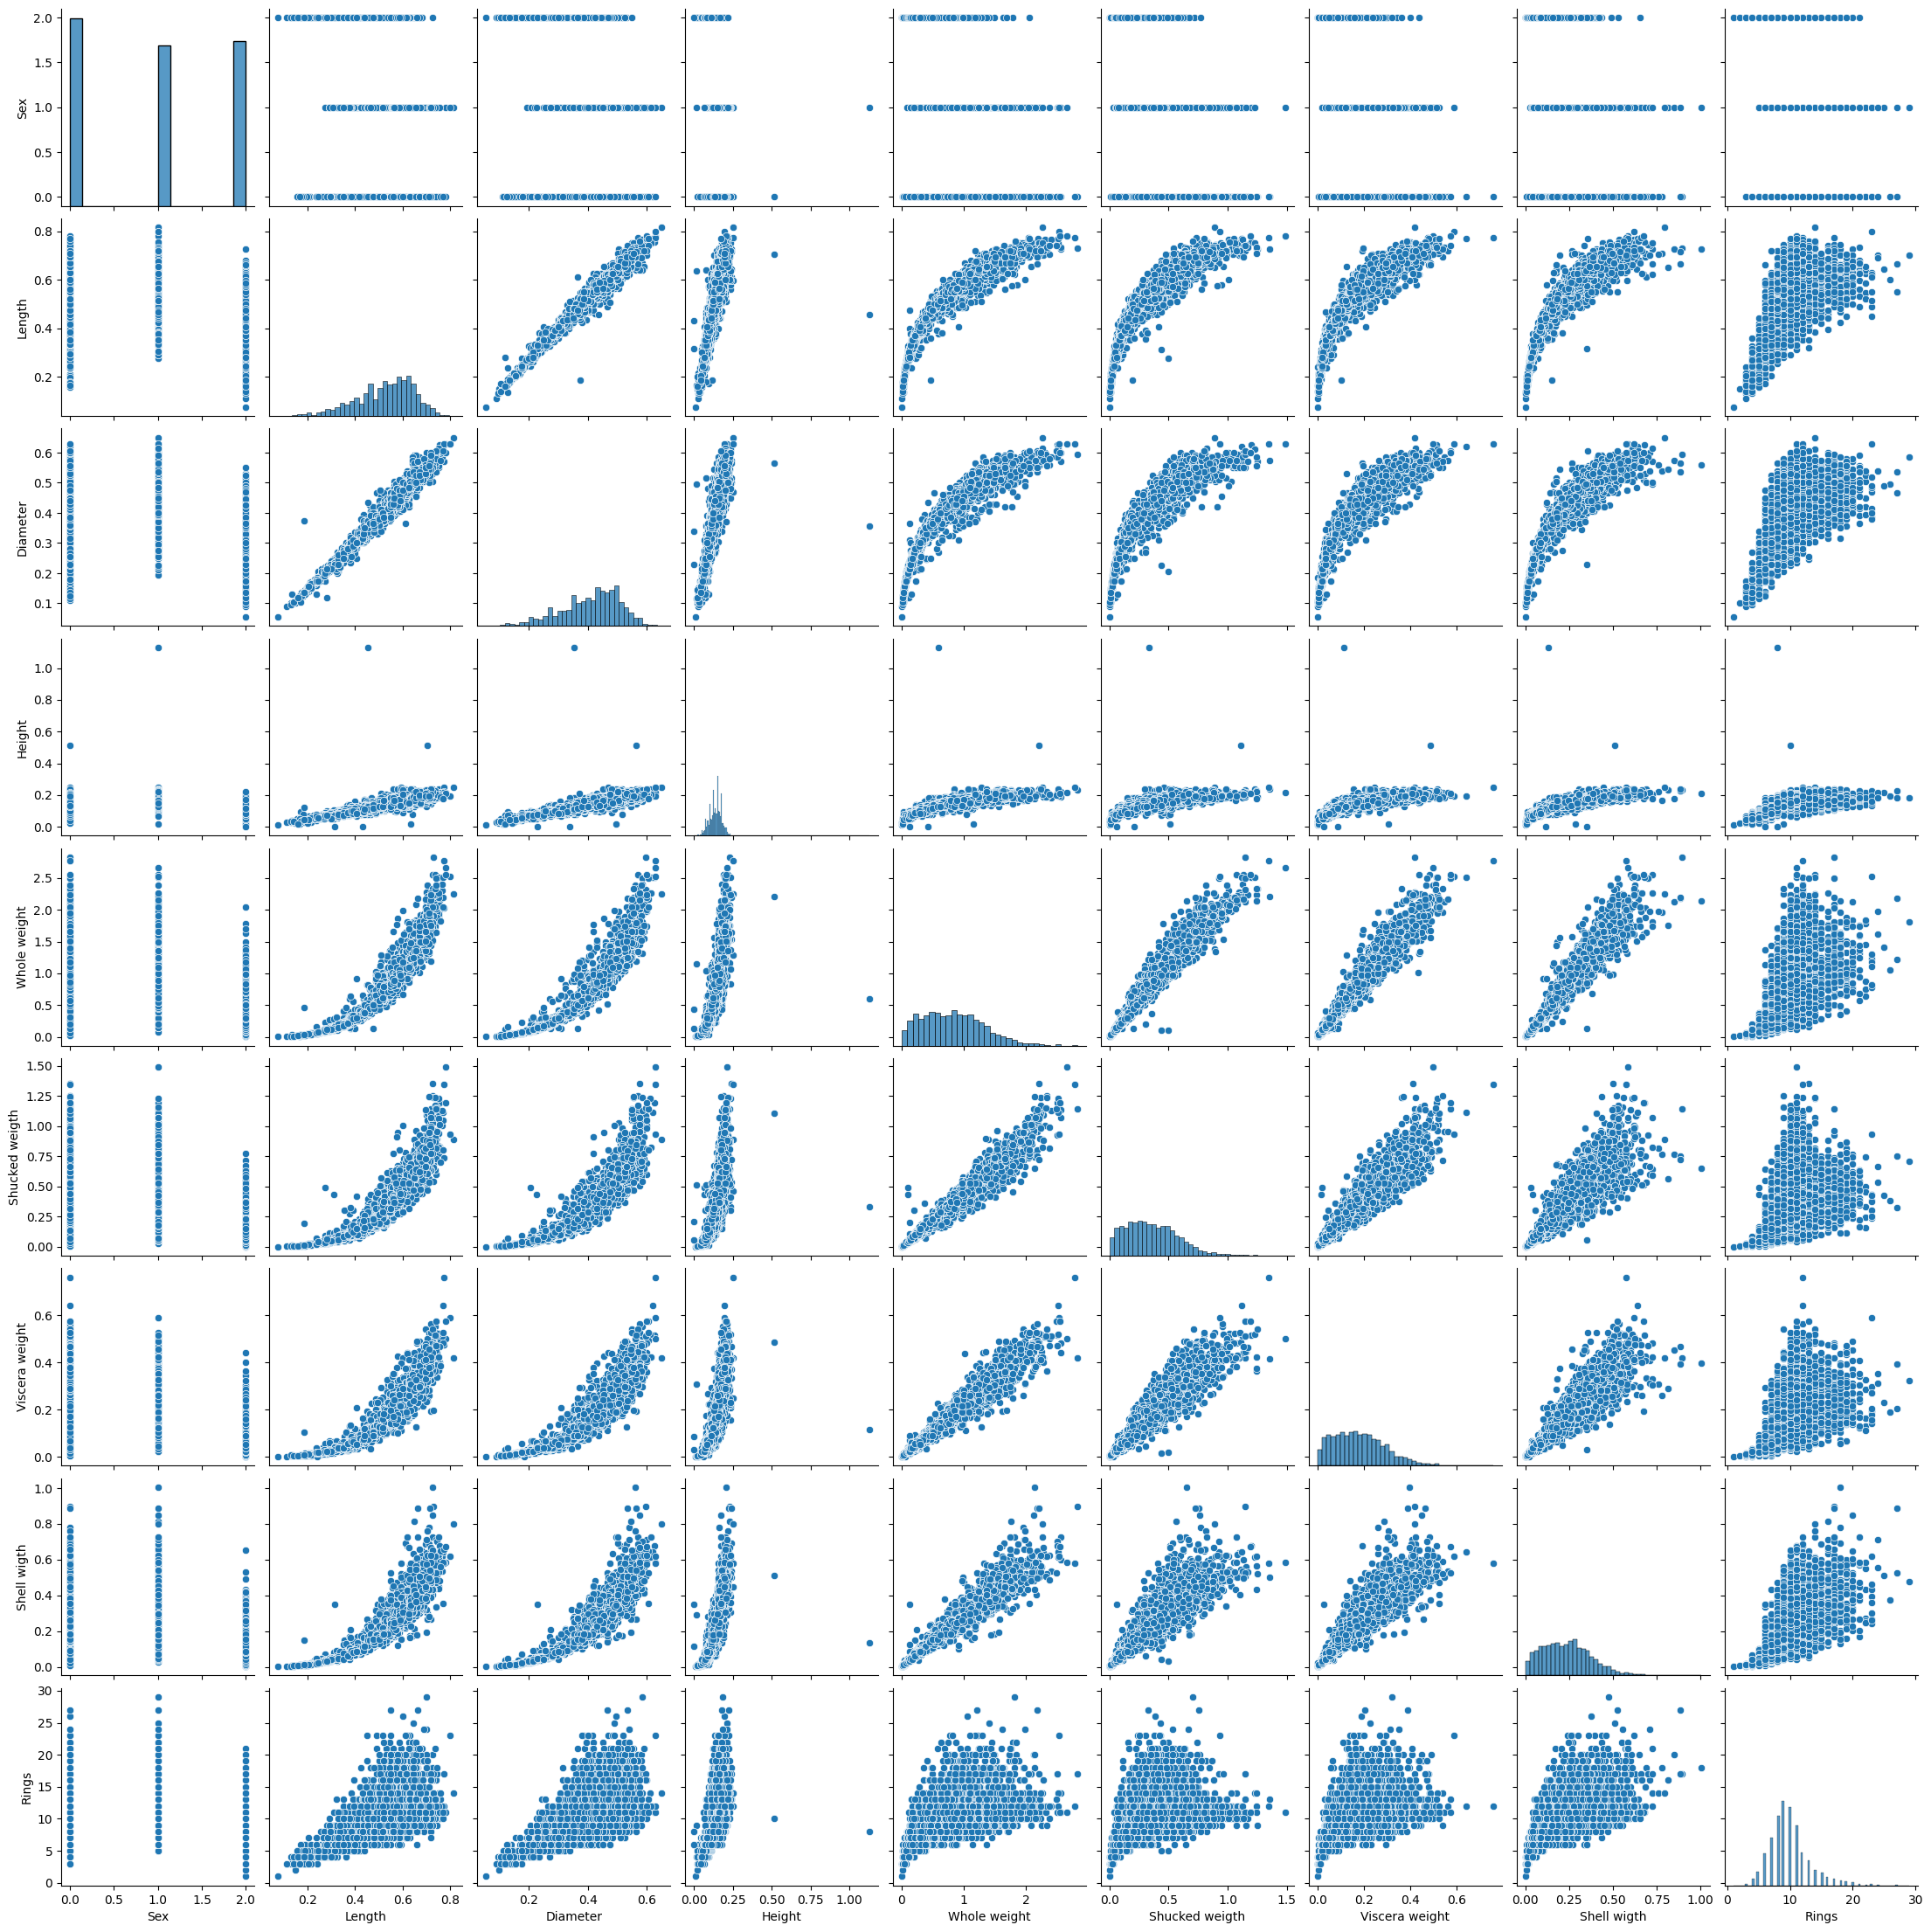

In [ ]:
plt.figure()
sns.pairplot(abalon, diag_kind="hist")
plt.show()